**Используется Python 3.6.1**

## Текст задания:
В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне.

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from math import sqrt
%matplotlib inline

## Экспоненциальное распределение

$X$ $\sim$ $Exp$($\lambda$).

Дисперсия: $\lambda^{-2}$

Мат. ожидание: $\lambda^{-1}$

In [2]:
lmbda = 1 # задаём единственнный параметр распределения вручную

In [3]:
n = 1000
r = sts.expon.rvs(size=n, scale=1/lmbda) # создадим выборку размера n

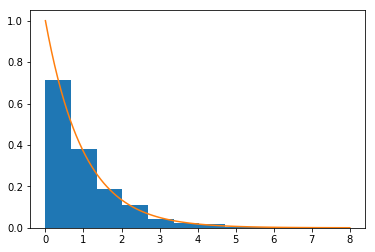

In [4]:
plt.hist(r, normed=True) # построим нормированную гистограмму распределения
x = np.linspace(0,8,100)
pdf = sts.expon.pdf(x) # нарисуем поверх гистограммы график плотности распределения
plt.plot(x, pdf, label='theoretical PDF') # label почему-то не работает

### Создадим $1000$ выборок, каждая из которых содержит $n$ элементов. Пусть $n_1=5$, $n_2=10$, $n_3=50$. 

In [5]:
sample1 = np.array([sts.expon.rvs(size=5, scale=1/lmbda) for _ in range(1000)])
sample2 = np.array([sts.expon.rvs(size=10, scale=1/lmbda) for _ in range(1000)])
sample3 = np.array([sts.expon.rvs(size=50, scale=1/lmbda) for _ in range(1000)])

In [6]:
avg = lambda arr: (sum(arr) / len(arr)) # создадим функцию для вычисления выборочного среднего

## распределение средних при $n = 5$ 

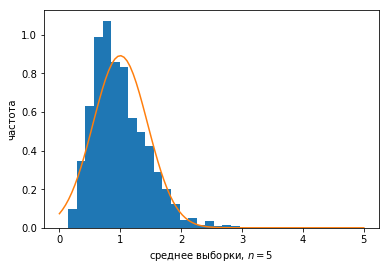

In [7]:
plt.hist([avg(x) for x in sample1], normed=True, bins=20) # найдем среднее у каждой выборки и построим гистограмму
plt.xlabel('среднее выборки, $n=5$')
plt.ylabel('частота')
# зададим нормальное распределение
x = np.linspace(0,5,100)
norm1 = sts.norm(1, sqrt(1/5)) # мю всегда будет равен единице, т.к. лямбда=1
pdf1 = norm1.pdf(x)
plt.plot(x, pdf1)




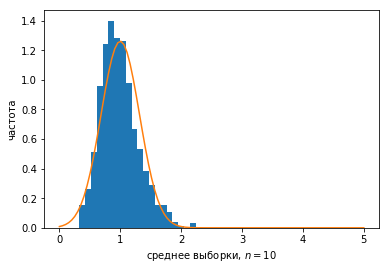

In [8]:
plt.hist([avg(x) for x in sample2], normed=True, bins=20)
plt.xlabel('среднее выборки, $n=10$')
plt.ylabel('частота')
norm1 = sts.norm(1, sqrt(1/10))
pdf1 = norm1.pdf(x)
plt.plot(x, pdf1)

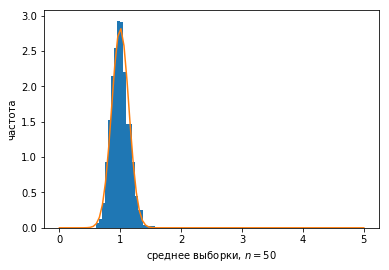

In [9]:
plt.hist([avg(x) for x in sample3], normed=True, bins=20)
plt.xlabel('среднее выборки, $n=50$')
plt.ylabel('частота')
norm1 = sts.norm(1, sqrt(1/50))
pdf1 = norm1.pdf(x)
plt.plot(x, pdf1)

Посчитаем параметры нормального распределения: $\mu=\lambda^{-1}$ и $\sigma^2$ = $\frac{\lambda^{-2}}{n}$. Не забудем, что функция scipy.stats.norm принимает вторым аргументом не дисперсию, а отклонение, следовательно берём корень из дисперсии.

## Вывод:

Точность апроксимации увеличивается с увеличением $n$. Можно увидеть, что площадь каждого подграфика функции с увеличением $n$ становится всё более заполнена гистограммой. 